In [1]:
%cd ..

%load_ext autoreload
%autoreload 2

/hdd/aouadt/these/projets/3d_segm


In [7]:
from importlib import reload

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

import deep_morpho.models.ste_activation as ste_activation
import deep_morpho.models.ste_model as ste_model


def reload_modules():
    for modl in [ste_activation, ste_model]:
        reload(modl)

# Binarized Neural Networks

## Morpho

In [3]:
reload_modules()
net = ste_model.BNNConv(kernel_size=3, channels=[1, 1, 1], do_batchnorm=True)
x = torch.rand(10, 1, 3, 3)

# print(net(x))

net(x).sum().backward()

# xb = x

# for layer_idx, layer in enumerate(net.convs):
#     print("Layer", layer_idx, layer)
#     x = layer.real_forward(xb)
#     xb = layer(xb)
#     if isinstance(layer, ste_model.BNNConv2d):
#         print("weights", layer.weight.data)
#     print("Real", x.data)
#     print("Bin", xb.data)

In [4]:
# print grads for all net parameters
for name, param in net.named_parameters():
    print(name, param.grad)


convs.0.layer.weight tensor([[[[ 0.5340, -0.7764,  0.4900],
          [ 0.2210, -1.0261, -1.1521],
          [ 0.8162, -0.3121,  0.9493]]]])
convs.0.layer.bias None
convs.1.weight tensor([-2.6140])
convs.1.bias tensor([3.8050])
convs.3.layer.weight tensor([[[[-2.4705,  0.8892,  0.7683],
          [ 1.7740, -0.4739, -1.7139],
          [ 2.5254,  2.5962, -0.5799]]]])
convs.3.layer.bias None
convs.4.weight tensor([-11.9216])
convs.4.bias tensor([62.])


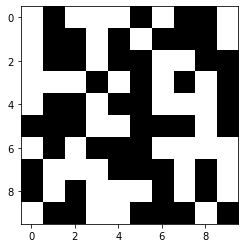

In [13]:
img = 2 * np.random.randint(0, 2, size=(10, 10)) - 1
plt.imshow(img, cmap='gray')

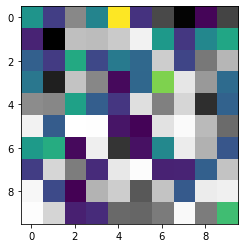

In [22]:
from matplotlib import colors

cmap = colors.ListedColormap(["gray", "red"])
bounds = [-1, 0, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

img = np.random.randn(10, 10)
data1 = np.ma.masked_array(img, img >= 0)
data2 = np.ma.masked_array(img, img < 0)



plt.imshow(data1, cmap="gray")
plt.imshow(data2, cmap="viridis")b

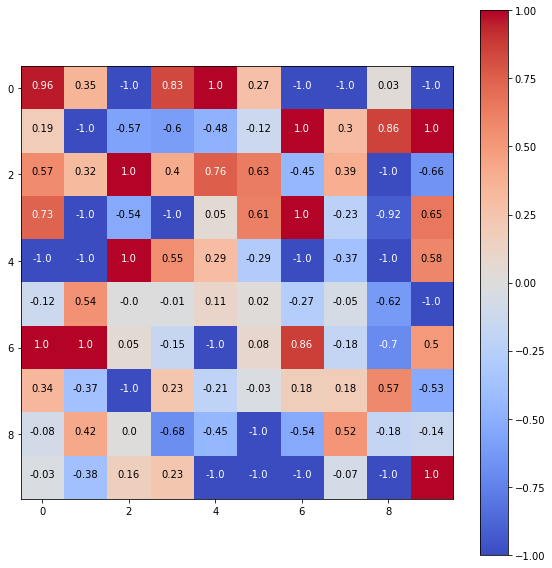

In [33]:
import deep_morpho.observables.plot_ste_weights as plot_ste_weights
plot_ste_weights.PlotSteWeights.get_figure_weights(torch.tensor(img));